# 📊  Coffee Shop Sales Analysis
Welcome to the Coffee Shop Sales Performance Analysis project. In this notebook, we will explore real-world coffee sales data from a vending machine, perform in-depth exploratory data analysis (EDA), build a predictive model to estimate future sales or revenue, and extract actionable insights to optimize product offerings and customer satisfaction.

## 📦 Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## 📁 Step 2: Load the Dataset

In [ ]:
data = pd.read_csv("coffee_sales.csv")

## 🔍 Step 3: Initial Exploration
- Display the first 5 rows to understand column structure and data format.
- Check column names, data types, and non-null counts.
- Identify missing entries in each column for cleaning.

In [ ]:
print("First 5 rows:\n", data.head())
print("\nData Info:\n")
print(data.info())
print("\nMissing values:\n", data.isnull().sum())

First 5 rows:
          date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1

## 🧼 Step 4: Data Cleaning
- Fix missing values, convert date formats, and create new features.
- Replace missing card numbers with `"CashUser"` for cash transactions.
- Convert `date` and `datetime` columns to proper datetime format.
- Feature Engineering : Extract `month`, `day of week`, and `hour` from date columns for analysis.


In [ ]:
# Data Cleaning
data['card'].fillna("CashUser", inplace=True)

# Convert date columns
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

# Feature Engineering
data['month'] = data['date'].dt.strftime('%Y-%m')
data['day'] = data['date'].dt.dayofweek  # Monday=0
data['hour'] = data['datetime'].dt.hour

## 📊 Step 5: EDA – Visualizations
- Visualize key patterns in coffee sales data.
- ☕ Coffee Type Frequency : Shows which coffee types are most frequently purchased.
- 📅 Sales by Weekday : Displays sales trends across different days of the week.
- ⏰ Sales by Hour : Reveals peak hours for coffee purchases.

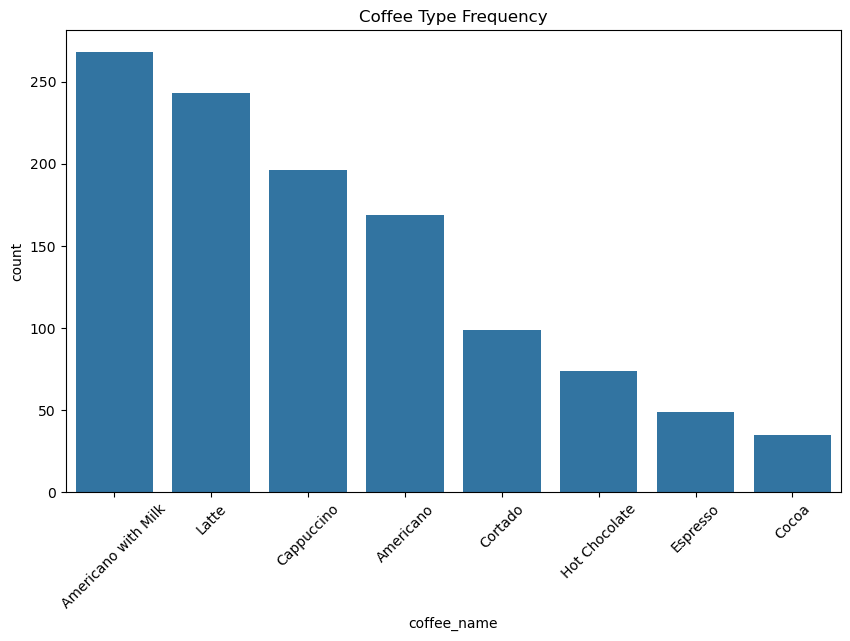

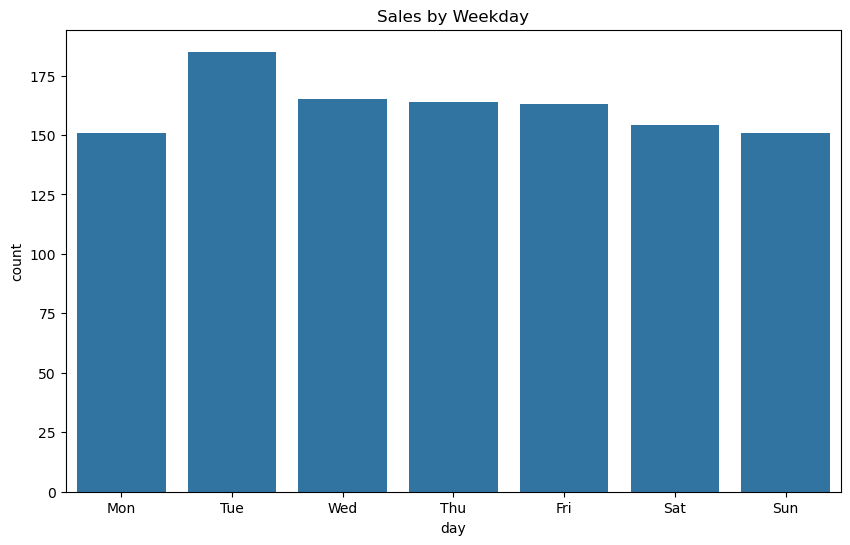

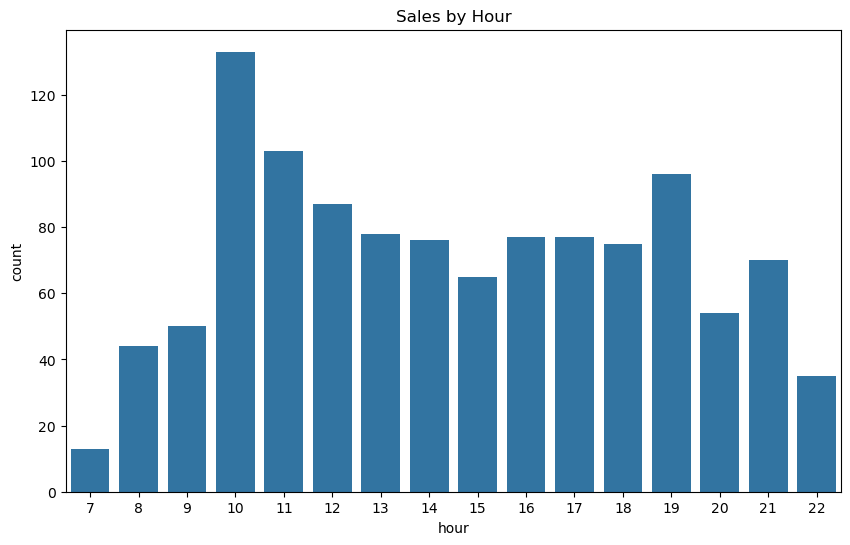

In [ ]:
# EDA - Visualizations
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='coffee_name', order=data['coffee_name'].value_counts().index)
plt.title("Coffee Type Frequency")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=data, x='day')
plt.title("Sales by Weekday")
plt.xticks(ticks=range(7), labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=data, x='hour')
plt.title("Sales by Hour")
plt.show()

## 📅 Step 6: Grouping – Monthly Sales
- Analyze monthly trends across coffee types.
- 📈 Monthly Sales by Coffee Type : Line chart showing how each coffee's sales change month by month.

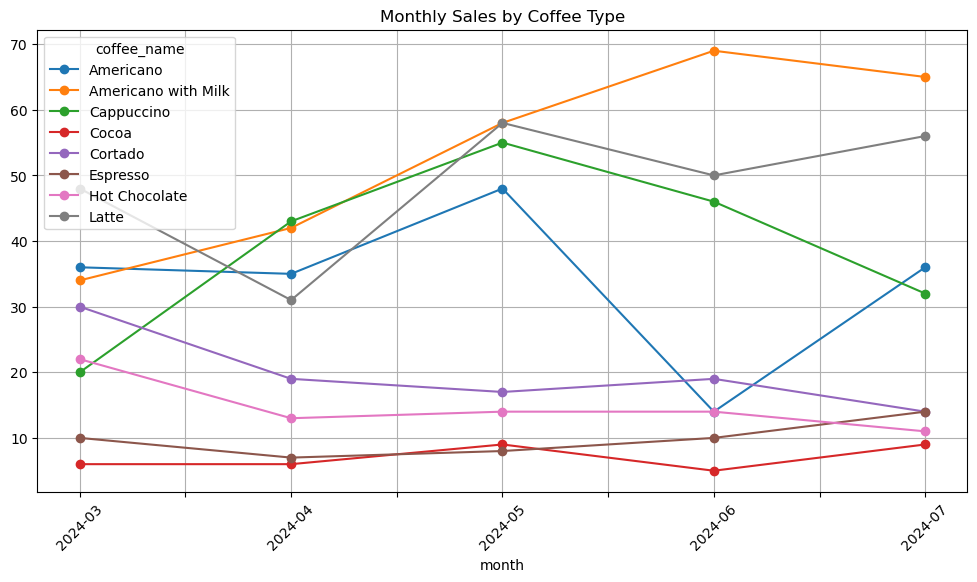

In [ ]:
# Grouping - Monthly Sales
monthly = data.groupby(['month', 'coffee_name']).size().unstack().fillna(0)
monthly.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Monthly Sales by Coffee Type")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 🤖 Step 7: ML Model – Predicting Sales Value
- Build a model to predict coffee sales amounts.
- 🧠 Model Training : Use linear regression to train the model on features like coffee type, payment mode, day, and hour.
- 📈 Prediction & Evaluation : Predict sales values and evaluate model performance using MSE and R² score.

In [ ]:
#  ML Model - Predicting Sales Value
X = data[['coffee_name', 'cash_type', 'day', 'hour']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numeric
y = data['money']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 3.341460953189515
R^2 Score: 0.8205105188270732



## 📌 Step 8: Coefficients + Conclusion

- Review model coefficients and summarize key findings.
- 📉 Model Coefficients : Understand how each feature influences the predicted sales value.

- 💡 Key Insights :
* Latte and Americano with Milk are top-sellers
* Sales peak around 10 AM and 7 PM
* Tuesday records the highest number of purchases
* Over 90% of payments are made via card

In [ ]:
# Coefficients + Conclusion
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:\n", coeff_df)

print("""
Insights:
- Most popular coffee: Latte, Americano with Milk
- Peak hours: Around 10AM and 7PM
- Highest sales on Tuesday
- Card is used in ~92% of the transactions
""")



Model Coefficients:
                                  Coefficient
day                                 0.045718
hour                                0.029867
coffee_name_Americano with Milk     4.656698
coffee_name_Cappuccino             10.057329
coffee_name_Cocoa                   9.673843
coffee_name_Cortado                 0.293048
coffee_name_Espresso               -5.136913
coffee_name_Hot Chocolate          10.169320
coffee_name_Latte                   9.700055
cash_type_cash                      2.664584

Insights:
- Most popular coffee: Latte, Americano with Milk
- Peak hours: Around 10AM and 7PM
- Highest sales on Tuesday
- Card is used in ~92% of the transactions

